<a href="https://colab.research.google.com/github/LiveKlas/DataScience_Projects/blob/main/notebooks/Build_a_Quantum_Artificial_Intelligence_Model_%E2%80%93_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build a Quantum Artificial Intelligence Model – With Python**

***Machine learning (ML) is one of the most important subareas of AI used in building great AI systems.***

In ML, deep learning is a narrow area focused solely on neural networks. Through the field of deep learning, systems like ChatGPT and many other AI models can be created. In other words, ChatGPT is just a giant system based on neural networks.

However, there is a big problem with deep learning: computational efficiency. Creating big and effective AI systems with neural networks often requires a lot of energy, which is expensive.

So, the more efficient the hardware is, the better. There are many solutions to solve this problem, one of which is quantum computing.

## **Artificial Intelligence and the Rise of Deep Learning**

#### **What is Deep Learning in Artificial Intelligence?**





Deep learning is a subfield of artificial intelligence. It uses neural networks to process complex patterns, just like the strategies a sports team uses to win a match.

The bigger the neural network, the more capable it is of doing awesome things – like ChatGPT, for example, which uses natural language processing to answer questions and interact with users.

To truly understand the basics of neural networks – what every single AI model has in common that enables it to work – we need to understand activation layers.

#### **Deep Learning = Training Neural Networks**

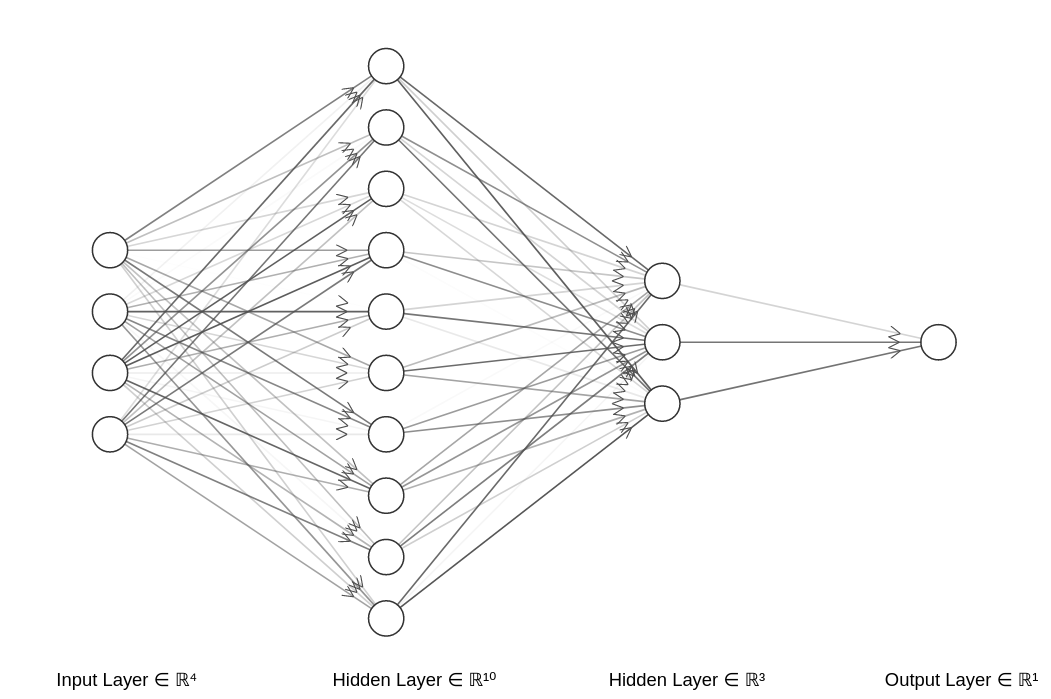

*Simple neural network*

At the core of deep learning is the training of neural networks. That means using data to get the right values for each neuron to be able to predict what we want.

Neural networks are made of neurons organized in layers. Each layer extracts unique features from the data.

This layered structure allows deep learning models to analyze and interpret complex data.

## **A Big Problem in Deep learning: Computational Efficiency**

Deep learning powers a lot of the transformation AI makes in the society. However, it comes with a big problem: computational efficiency.

Training deep learning AI systems requires massive amounts of data and computational power. This can take minutes to weeks and in the process, it consumes a lot of energy and computational resources.
There are many solutions to this problem, such as better algorithmic efficiency.

In large language models, this has been the focus of much AI research. To make smaller models have the same performance as larger ones.

Another solution, besides algorithmic efficiency, is better computational efficiency. Quantum computing is one of the solutions related to better computational efficiency.


## **A Solution: Quantum Computing**

Quantum computing is a promising solution to the computational efficiency problem in deep learning.
While normal computers work in bits (either 0 or 1), quantum computers work with qubits – can be 0 and 1 at the same time.

With the qubits representing 0 and 1 at the same time, it is possible to process many possibilities simultaneously, thanks to a property called superposition in quantum physics.

This makes the quantum computers, for certain tasks, far more efficient than normal computers.

This way, it is also possible to have quantum-based algorithms that are more efficient than normal algorithms. This way, reducing the energy consumption used when creating AI models.


#### **Why Are Quantum Computers Not So Widely Used?**

The problem with quantum computation is that there isn't a good, cheap physical representation of qubits.
Bits are created and managed with logic gates made from tiny transistors, which can be easily created by the billions.

Qubits are created and managed by superconducting circuits, trapped ions, and topological qubits, which are all very expensive.

This is the biggest problem in quantum computation. However, IBM, Amazon, and many others in cloud services allow people to run code on their quantum computers.


## **Code Example: A Quantum AI Model for Quantum Chemistry**

In this code example, we'll solve a quantum chemistry problem:

***What is the lowest energy level of the H₂ molecule using quantum computing?***

Before understanding the problem at hand, let's discuss quantum chemistry.


#### **What is Quantum Chemistry?**

Quantum chemistry is a field of science that looks at how electrons behave in atoms and molecules.

It is about using quantum physics to understand how electrons, atoms, molecules and many more tiny particles interact and form different chemical substances.


##### **The Problem We Want to Solve**

We want to find the "ground state energy" of the H₂ molecule.

The H₂ molecule means hydrogen gas, which is present in:

*   Water
*   Organic compounds
*   Stars

Actually, life on Earth would not be possible without it.

By finding the "ground state energy," which is the lowest possible energy that the molecule can have, we can know its most stable form and properties.
This allows scientists to better understand chemical reactions related to H₂.

With classical computers, this problem can be very complex due to a huge number of possibilities and intricate interactions.

With quantum computers, qubits are good representations of electrons, which can directly simulate the behavior of electrons in molecules.

#### **Approximating with the VQE (Variational Quantum Eigensolver)**

The Variational Quantum Eigensolver (VQE) is a hybrid algorithm that leverages both quantum and classical computing.

In this example, the VQE algorithm is used to find the ground state energy of a simple H₂ molecule.
The code is designed to run on a quantum simulator (which is a classical computer running a quantum algorithm).

However, it can be adapted to run on actual quantum hardware through a cloud-based quantum computing service.

This would involve using both quantum and classical resources in practice. Let’s go through the code step by step!


```
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Define the molecule (H2 at bond length of 0.74 Å)
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.74])

# Generate the Hamiltonian for the molecule
hamiltonian, qubits = qml.qchem.molecular_hamiltonian(
    symbols, coordinates
)

# Define the quantum device
dev = qml.device("default.qubit", wires=qubits)

# Define the ansatz (variational quantum circuit)
def ansatz(params, wires):
    qml.BasisState(np.array([0] * qubits), wires=wires)
    for i in range(qubits):
        qml.RY(params[i], wires=wires[i])
    for i in range(qubits - 1):
        qml.CNOT(wires=[wires[i], wires[i + 1]])

# Define the cost function
@qml.qnode(dev)
def cost_fn(params):
    ansatz(params, wires=range(qubits))
    return qml.expval(hamiltonian)

# Set a fixed seed for reproducibility
np.random.seed(42)

# Set the initial parameters
params = np.random.random(qubits, requires_grad=True)

# Choose an optimizer
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)

# Number of optimization steps
max_iterations = 100
conv_tol = 1e-06

# Optimization loop
energies = []

for n in range(max_iterations):
    params, prev_energy = optimizer.step_and_cost(cost_fn, params)

    energy = cost_fn(params)
    energies.append(energy)
    if np.abs(energy - prev_energy) < conv_tol:
        break

    print(f"Step = {n}, Energy = {energy:.8f} Ha")

print(f"Final ground state energy = {energy:.8f} Ha")

# Visualize the results
import matplotlib.pyplot as plt

iterations = range(len(energies))

plt.plot(iterations, energies)
plt.xlabel('Iteration')
plt.ylabel('Energy (Ha)')
plt.title('Convergence of VQE for H2 Molecule')
plt.show()
```

#### **Importing Libraries**

```
import pennylane as qml
from pennylane import numpy as np
```

* [**pennylane:**](https://pennylane.ai/) A library for quantum computing that provides tools for creating and optimizing quantum circuits, and for running machine learning quantum based algorithms.

* [**numpy:**](https://numpy.org/) A library for numerical operations in Python, used here for handling arrays and mathematical computations.

* [**matplotlib**](https://matplotlib.org/): A library for creating visualizations and plots in Python, used here to graph the convergence of the VQE algorithm.


#### **Defining the Molecule and Generating the Hamiltonian**

```
# Define the molecule (H2 at bond length of 0.74 Å)
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.74])

# Generate the Hamiltonian for the molecule
hamiltonian, qubits = qml.qchem.molecular_hamiltonian(
    symbols, coordinates
)

```

**Defining the Molecule:**

*   We are defined a hydrogen molecule (H₂).
*   symbols = ["H", "H"]: This means the molecule consists of two hydrogen (H) atoms.
*   coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.74]): This gives the positions of the two hydrogen atoms. The first hydrogen atom is at the origin (0.0, 0.0, 0.0), and the second hydrogen atom is at (0.0, 0.0, 0.74), which means it is 0.74 angstroms away from the first atom along the z-axis.



**Generating the Hamiltonian:**

* hamiltonian, qubits = qml.qchem.molecular_hamiltonian(symbols, coordinates): This line generates the Hamiltonian for the hydrogen molecule. The Hamiltonian is a mathematical object used to describe the energy of the molecule.
* **hamiltonian:** Represents the energy operator for the molecule.
* **qubits:** Represents the number of quantum bits (qubits) needed to simulate the molecule on a quantum computer.


#### **Defining the Quantum Device and Ansatz (Variational Quantum Circuit)**

```
# Define the quantum device
dev = qml.device("default.qubit", wires=qubits)

# Define the ansatz (variational quantum circuit)
def ansatz(params, wires):
    qml.BasisState(np.array([0] * qubits), wires=wires)
    for i in range(qubits):
        qml.RY(params[i], wires=wires[i])
    for i in range(qubits - 1):
        qml.CNOT(wires=[wires[i], wires[i + 1]])
```

**Defining the Quantum Device:**

* dev = qml.device("default.qubit", wires=qubits): This line sets up a quantum computing device to simulate our molecule.
*	"default.qubit": This specifies the type of quantum simulator we are using (a default qubit-based simulator).
*	wires=qubits: This tells the simulator how many qubits (quantum bits) it needs to use, based on the number of qubits we determined earlier.


**Defining the Ansatz (Variational Quantum Circuit):**

* def ansatz(params, wires): This defines a function named ansatz which describes the variational quantum circuit. This circuit will be used to find the ground state energy of the molecule.
* qml.BasisState(np.array([0] * qubits), wires=wires): This initializes the qubits in the state 0. The np.array([0] * qubits) creates an array with zeros, one for each qubit.
* for i in range(qubits): qml.RY(params[i], wires=wires[i]): This loop applies a rotation around the Y-axis to each qubit. params[i] provides the angle for each rotation.
* for i in range(qubits - 1): qml.CNOT(wires=[wires[i], wires[i + 1]]): This loop applies Controlled-NOT (CNOT) gates between consecutive qubits, entangling them.


#### **Defining the Cost Function, Setting Initial Parameters and Optimizer**

```
# Define the cost function
@qml.qnode(dev)
def cost_fn(params):
    ansatz(params, wires=range(qubits))
    return qml.expval(hamiltonian)

# Set a fixed seed for reproducibility
np.random.seed(42)

# Set the initial parameters
params = np.random.random(qubits, requires_grad=True)

# Choose an optimizer
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)
```

**Defining the Cost Function:**

*	@qml.qnode(dev): This line is a decorator that transforms the cost_fn function into a quantum node, allowing it to run on the quantum device dev.
*	def cost_fn(params): This defines a function named cost_fn that takes some parameters (params) as input.
*	ansatz(params, wires=range(qubits)): Inside this function, we call the previously defined ansatz function, passing in the parameters and specifying that it should use all the qubits.
*	return qml.expval(hamiltonian): This line returns the expected value of the Hamiltonian, which represents the energy of the molecule. The cost function is what we aim to minimize to find the ground state energy.


**Setting a Fixed Seed for Reproducibility:**

* np.random.seed(42): This line sets a fixed seed for the random number generator. This ensures that the random numbers generated will be the same each time the code is run, making the results reproducible.

**Setting the Initial Parameters:**

* **params = np.random.random(qubits, requires_grad=True)**: This line initializes the parameters for the ansatz with random values. The number of parameters is equal to the number of qubits.
The **requires_grad=True** part indicates that these parameters can be adjusted during optimization.

**Choosing an Optimizer:**

* **optimizer = qml.GradientDescentOptimizer(stepsize=0.4)**: This line creates an optimizer that will adjust the parameters to minimize the cost function. Specifically, it uses gradient descent with a step size of 0.4.

#### **Optimization Loop**

```
# Number of optimization steps
max_iterations = 100
conv_tol = 1e-06

# Optimization loop
energies = []

for n in range(max_iterations):
    params, prev_energy = optimizer.step_and_cost(cost_fn, params)

    energy = cost_fn(params)
    energies.append(energy)
    if np.abs(energy - prev_energy) < conv_tol:
        break

    print(f"Step = {n}, Energy = {energy:.8f} Ha")

print(f"Final ground state energy = {energy:.8f} Ha")
```

**Setting the Number of Optimization Steps:**

* max_iterations = 100: This sets the maximum number of steps the optimization will take. In this case, it is 100 steps.
* conv_tol = 1e-06: This defines the convergence tolerance. If the change in energy between steps is less than this value, the optimization will stop.


**Optimization Loop:**

* energies = []: This initializes an empty list to store the energies calculated at each step.

**Looping Through Optimization Steps:**

*	for n in range(max_iterations):: This starts a loop that will run up to max_iterations times.
*	params, prev_energy = optimizer.step_and_cost(cost_fn, params): This line performs one step of optimization. It updates the parameters and returns the new parameters and the previous energy.
*	energy = cost_fn(params): This calculates the current energy using the updated parameters.
* energies.append(energy): This adds the current energy to the energies list.
* if np.abs(energy - prev_energy) < conv_tol: break: This checks if the absolute difference between the current energy and the previous energy is less than the convergence tolerance. If it is, the loop stops early because the optimization has converged.
* print(f"Step = {n}, Energy = {energy:.8f} Ha"): This prints the current step number and the energy in Hartree (Ha) to eight decimal places.


**Printing the Final Energy:**

* print(f"Final ground state energy = {energy:.8f} Ha"): After the loop, this prints the final ground state energy.

#### **Visualizing the Results**

```
# Visualize the results
iterations = range(len(energies))

plt.plot(iterations, energies)
plt.xlabel('Iteration')
plt.ylabel('Energy (Ha)')
plt.title('Convergence of VQE for H2 Molecule')
plt.show()

```

**Setting Up the Data for Visualization:**

*	iterations = range(len(energies)): This creates a range object representing the number of iterations (steps) the optimization went through. len(energies) gives the number of energy values recorded.

**Plotting the Results:**

* plt.plot(iterations, energies): This line creates a plot with the iteration numbers on the x-axis and the corresponding energy values on the y-axis.
*	plt.xlabel('Iteration'): This sets the label for the x-axis to "Iteration".
*	plt.ylabel('Energy (Ha)'): This sets the label for the y-axis to "Energy (Ha)", where "Ha" stands for Hartree, a unit of energy.
*	plt.title('Convergence of VQE for H2 Molecule'): This sets the title of the plot to "Convergence of VQE for H2 Molecule".
*	plt.show(): This displays the plot.


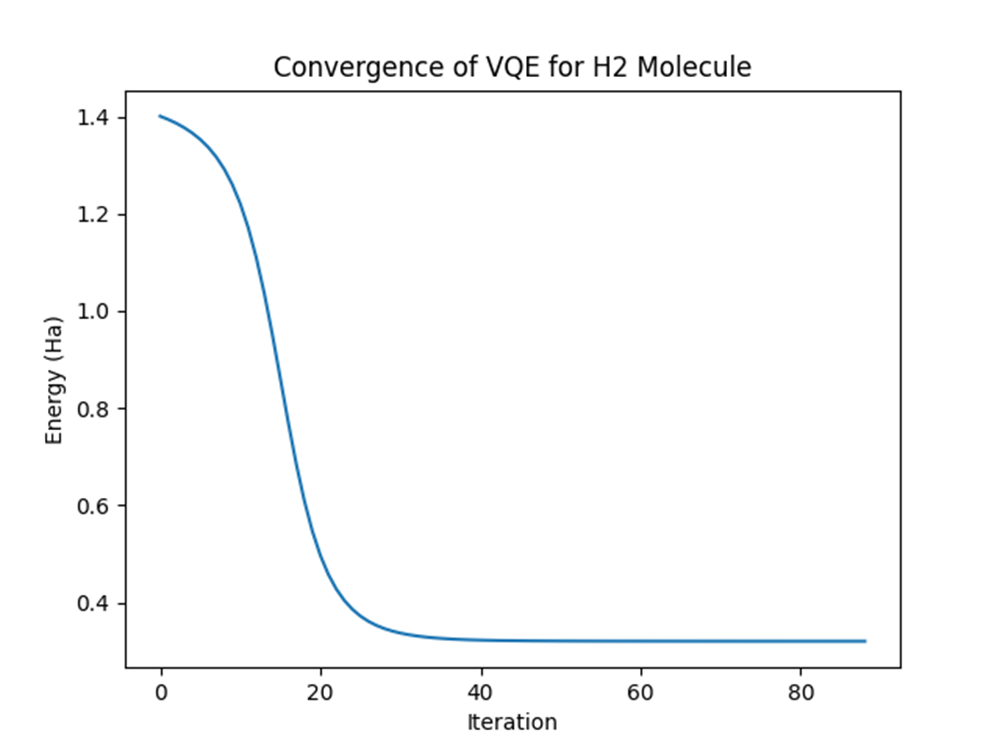

The graph titled "Convergence of VQE for H2 Molecule" shows the energy (in Hartree, Ha) of the H2 molecule plotted against the number of iterations of the Variational Quantum Eigensolver (VQE) algorithm.

*	**X-Axis (Iteration):** Number of VQE iterations.
*	**Y-Axis (Energy (Ha)):** Energy of the H2 molecule in Hartree.


#### **Key Points:**

*	**Initial Energy:** Approximately 1.4 Ha at iteration 0.
*	**Rapid Decrease:** Energy quickly drops within the first 20 iterations.
*	**Plateau:** Energy stabilizes around 0.4 Ha after 20 iterations, indicating convergence to an optimal or near-optimal solution.


## **Conclusion: Limitations of Quantum Computing and Development**

Besides making AI algorithms far more computationally efficient, quantum computing can revolutionize many fields like:

*	Drug discovery
*	Material science
*	Cryptography
*	Financial modeling
*	Optimization problems
*	Climate modeling
*	Machine learning



However, for all of us to use quantum computing, a way to physically represent qubits small enough to fit on our laptops is needed. That will take years

## **Full Source Code**

In [1]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.7 MB/s eta 0:00:00


Step = 0, Energy = 1.40040436 Ha
Step = 1, Energy = 1.39377357 Ha
Step = 2, Energy = 1.38602898 Ha
Step = 3, Energy = 1.37688214 Ha
Step = 4, Energy = 1.36595377 Ha
Step = 5, Energy = 1.35274042 Ha
Step = 6, Energy = 1.33657169 Ha
Step = 7, Energy = 1.31655916 Ha
Step = 8, Energy = 1.29154373 Ha
Step = 9, Energy = 1.26006129 Ha
Step = 10, Energy = 1.22037054 Ha
Step = 11, Energy = 1.17062226 Ha
Step = 12, Energy = 1.10927724 Ha
Step = 13, Energy = 1.03584026 Ha
Step = 14, Energy = 0.95177135 Ha
Step = 15, Energy = 0.86105933 Ha
Step = 16, Energy = 0.76974278 Ha
Step = 17, Energy = 0.68420726 Ha
Step = 18, Energy = 0.60918981 Ha
Step = 19, Energy = 0.54677922 Ha
Step = 20, Energy = 0.49675027 Ha
Step = 21, Energy = 0.45755201 Ha
Step = 22, Energy = 0.42720211 Ha
Step = 23, Energy = 0.40380829 Ha
Step = 24, Energy = 0.38577584 Ha
Step = 25, Energy = 0.37184079 Ha
Step = 26, Energy = 0.36103130 Ha
Step = 27, Energy = 0.35261019 Ha
Step = 28, Energy = 0.34602081 Ha
Step = 29, Energy = 0.34

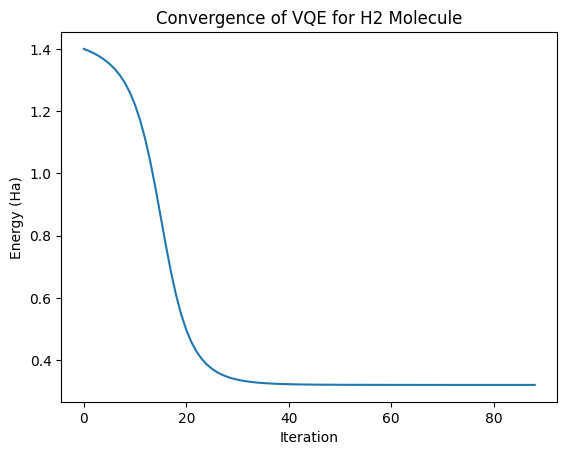

In [2]:
import pennylane as qml
from pennylane import numpy as np

# Define the molecule (H2 at bond length of 0.74 Å)
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.74])

# Generate the Hamiltonian for the molecule
hamiltonian, qubits = qml.qchem.molecular_hamiltonian(
    symbols, coordinates
)

# Define the quantum device
dev = qml.device("default.qubit", wires=qubits)

# Define the ansatz (variational quantum circuit)
def ansatz(params, wires):
    qml.BasisState(np.array([0] * qubits), wires=wires)
    for i in range(qubits):
        qml.RY(params[i], wires=wires[i])
    for i in range(qubits - 1):
        qml.CNOT(wires=[wires[i], wires[i + 1]])

# Define the cost function
@qml.qnode(dev)
def cost_fn(params):
    ansatz(params, wires=range(qubits))
    return qml.expval(hamiltonian)

# Set a fixed seed for reproducibility
np.random.seed(42)

# Set the initial parameters
params = np.random.random(qubits, requires_grad=True)

# Choose an optimizer
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)

# Number of optimization steps
max_iterations = 100
conv_tol = 1e-06

# Optimization loop
energies = []

for n in range(max_iterations):
    params, prev_energy = optimizer.step_and_cost(cost_fn, params)

    energy = cost_fn(params)
    energies.append(energy)
    if np.abs(energy - prev_energy) < conv_tol:
        break

    print(f"Step = {n}, Energy = {energy:.8f} Ha")

print(f"Final ground state energy = {energy:.8f} Ha")

# Visualize the results
import matplotlib.pyplot as plt

iterations = range(len(energies))

plt.plot(iterations, energies)
plt.xlabel('Iteration')
plt.ylabel('Energy (Ha)')
plt.title('Convergence of VQE for H2 Molecule')
plt.show()